In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib_venn import venn2

In [15]:
df=pd.read_csv("train.csv")
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [16]:
df.shape

(159571, 8)

In [17]:
df.info

<bound method DataFrame.info of                       id                                       comment_text  \
0       0000997932d777bf  Explanation\nWhy the edits made under my usern...   
1       000103f0d9cfb60f  D'aww! He matches this background colour I'm s...   
2       000113f07ec002fd  Hey man, I'm really not trying to edit war. It...   
3       0001b41b1c6bb37e  "\nMore\nI can't make any real suggestions on ...   
4       0001d958c54c6e35  You, sir, are my hero. Any chance you remember...   
...                  ...                                                ...   
159566  ffe987279560d7ff  ":::::And for the second time of asking, when ...   
159567  ffea4adeee384e90  You should be ashamed of yourself \n\nThat is ...   
159568  ffee36eab5c267c9  Spitzer \n\nUmm, theres no actual article for ...   
159569  fff125370e4aaaf3  And it looks like it was actually you who put ...   
159570  fff46fc426af1f9a  "\nAnd ... I really don't think you understand...   

        toxic  seve

In [18]:
df.isnull().sum()

id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64

In [19]:
COLUMNS = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
count=df[COLUMNS].sum()

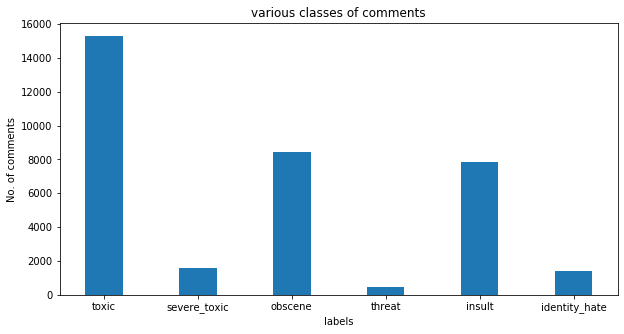

In [20]:
fig = plt.figure(figsize = (10, 5)) 
plt.bar(COLUMNS,count,width = 0.4)
plt.xlabel("labels") 
plt.ylabel("No. of comments") 
plt.title("various classes of comments") 
plt.show()


In [21]:
df['None'] = (df[COLUMNS].max(axis=1) == 0).astype(int)
COLUMNS.append('None')
df['None'].sum()

143346

In [22]:
df_comb = df.groupby(COLUMNS).size().sort_values(ascending=False).reset_index().rename(columns={0: 'count'})
df_comb

,toxic,severe_toxic,obscene,threat,insult,identity_hate,None,count
0,0,0,0,0,0,0,1,143346
1,1,0,0,0,0,0,0,5666
2,1,0,1,0,1,0,0,3800
3,1,0,1,0,0,0,0,1758
4,1,0,0,0,1,0,0,1215
5,1,1,1,0,1,0,0,989
6,1,0,1,0,1,1,0,618
7,0,0,1,0,0,0,0,317
8,0,0,0,0,1,0,0,301
9,1,1,1,0,1,1,0,265


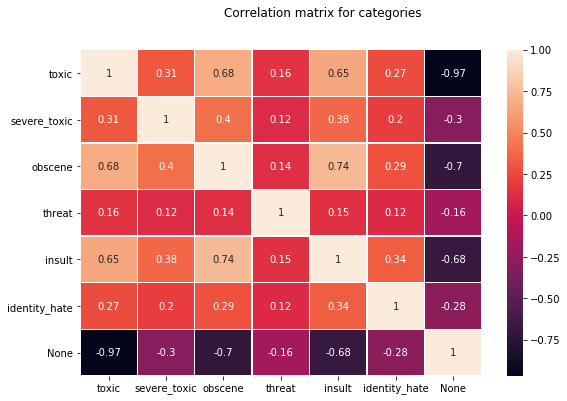

In [23]:
f, ax = plt.subplots(figsize=(9, 6))
f.suptitle('Correlation matrix for categories')
sns.heatmap(df[COLUMNS].corr(), annot=True, linewidths=.5, ax=ax)

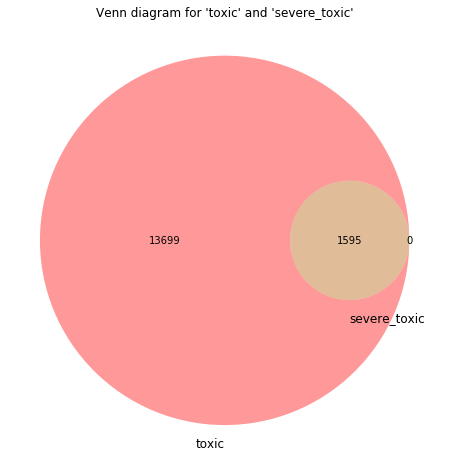

In [24]:
t = df[(df['toxic'] == 1) & (df['severe_toxic'] == 0)].shape[0]
s = df[(df['toxic'] == 0) & (df['severe_toxic'] == 1)].shape[0]

t_s = df[(df['toxic'] == 1) & (df['severe_toxic'] == 1)].shape[0]

plt.figure(figsize=(8, 8))
plt.title("Venn diagram for 'toxic' and 'severe_toxic'")
venn2(subsets = (t, s, t_s), 
      set_labels=('toxic', 'severe_toxic'))
plt.show()

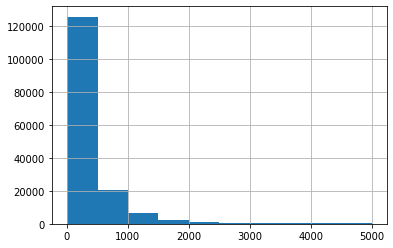

In [25]:
lens = df.comment_text.str.len()
lens.hist()

In [26]:
lens.mean(), lens.std(), lens.max()

(394.138847284281, 590.7253812496405, 5000)